# **Maestria en Ingenieria Economica - Universidad Nacional de Ingenieria**

---

### Curso: _Macroeconomia_

### Profesor (_TA_): _Rodney Menezes_ 

### Tema: _Modelo de crecimiento Neoclasico - Bellman_

### Fecha: _02/12/2023_

---


Para resolver el modelo de Crecimiento Neoclásico Estocástico mediante el método de Value Function Iteration (VFI), primero vamos a establecer la ecuación de Bellman. El modelo es un caso clásico de un problema de optimización dinámica bajo incertidumbre.

La ecuación de Bellman para este problema se puede escribir como:

$$V(k_t, \varepsilon_t) = \max_{C_t,K_{t+1}}\{\ln(C_t)+\beta E[V(k_t, \varepsilon_t) \mid \varepsilon_t] \} $$

Sujeto a:

$$C_t +K_{t+1} \leq k^{\alpha}_t \varepsilon_t$$

$$K_{t+1} \geq 0$$

$$C_t \geq 0$$ 


Donde $V(k_t, \varepsilon_t)$ es la función de valor, $\beta$ es el factor de descuento, $C_t$ es el consumo en el tiempo $t$, $K_{t+1}$  es el capital en el tiempo $t+1$, y $\varepsilon_t$ es el término estocástico que afecta la producción.

Para implementar el VFI, seguiremos estos pasos:

- Inicializar una función de valor arbitraria, por ejemplo, $V_0(k_t, \varepsilon_t) = 0$ para todos los $k$ y $\varepsilon$
- Resolver el problema de maximización en la ecuación de Bellman para encontrar la función de política óptima.
- Actualizar la función de valor con el resultado del paso 2.
- Repetir los pasos 2 y 3 hasta que la función de valor converja.

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.interpolate import interp1d

# Parámetros del modelo (ajustados para mejorar la velocidad)
alpha = 0.33
beta = 0.96
sigma_eps = 0.1
num_k = 20  
num_eps = 10 
k_min = 0.1
k_max = 5
k_grid = np.linspace(k_min, k_max, num_k)
eps_grid = np.random.normal(1, sigma_eps, num_eps)

# Funciones de utilidad y producción
def utility(c):
    return np.log(c)

def production(k, eps):
    return k**alpha * eps

# Función de valor inicial
V_initial = np.zeros((num_k, num_eps))

# Precisión para la convergencia
tolerance = 1e-4
difference = 1

# Value Function Iteration
policy_function = np.zeros((num_k, num_eps))
while difference > tolerance:
    V_new = np.copy(V_initial)
    for j, eps in enumerate(eps_grid):
        for i, k in enumerate(k_grid):
            def objective(K_next):
                C = production(k, eps) - K_next
                if C <= 0:
                    return np.inf
                interp_func = interp1d(k_grid, V_initial[:, j], kind='linear', fill_value="extrapolate")
                V_next = interp_func(K_next)
                return -(utility(C) + beta * np.mean(V_next))

            result = minimize_scalar(objective, bounds=(0, production(k, eps)), method='bounded')
            V_new[i, j] = -result.fun
            policy_function[i, j] = production(k, eps) - result.x

    difference = np.max(np.abs(V_new - V_initial))
    V_initial = np.copy(V_new)


# Resultados
print("Función de Valor Final:\n", V_initial)
print("Función de Política Óptima:\n", policy_function)


KeyboardInterrupt: 

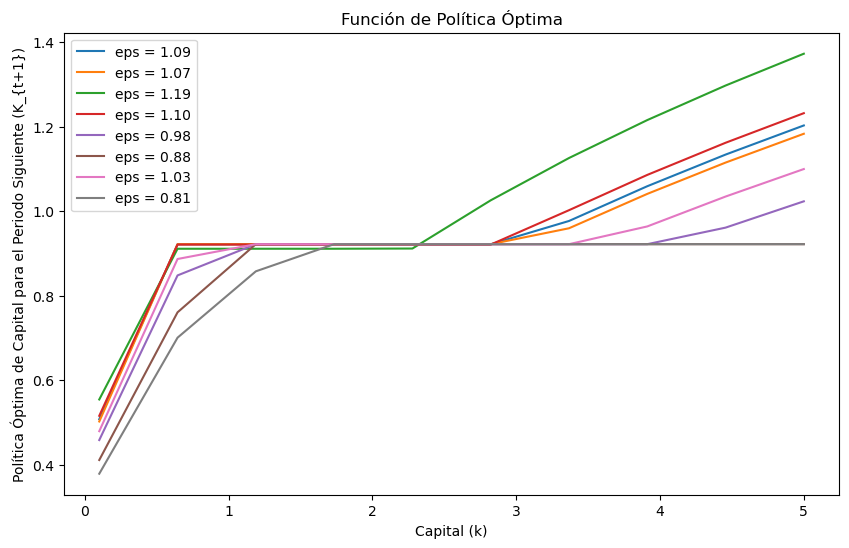

In [17]:
import matplotlib.pyplot as plt

# Graficar la función de política
plt.figure(figsize=(10, 6))
for j in range(num_eps):
    plt.plot(k_grid, policy_function[:, j], label=f'eps = {eps_grid[j]:.2f}')

plt.title('Función de Política Óptima')
plt.xlabel('Capital (k)')
plt.ylabel('Política Óptima de Capital para el Periodo Siguiente (K_{t+1})')
plt.legend()
plt.show()